# Phase #1:
## Goal of collecting the dataset:
The primary aim of collecting the Brain Stroke Data dataset is to analyse and predict stroke occurrences based on various factors. Our data mining project will focus classification and clustering to predict the occurrence of stroke based on the attributes in the dataset, helping doctors and researchers to understand the factors that contribute to the risk of stroke as this is crucial for developing these strategies, clustering can help us identifying risk group, this can help identify subgroups with similar risk profiles for stroke.

## The source of the dataset:
https://www.kaggle.com/datasets/niranjanank/brain-stroke-data

#### Read dataset:

In [1]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

KeyboardInterrupt: 

In [2]:
import pandas as pd
df= pd.read_csv('/content/Stroke_final.csv')
import matplotlib.pyplot as plt
import seaborn as sns

## General information about the dataset:
- Number of objects in original dataset: 4981.
- Number of attributes: 11.
- Class labels: stroke.
- Missing values: there is no missing values.
- Dublicates: there is no dublicate objects.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


#### Attributes data types:

| Attributes name | Data type | Possible Values |
|----------------|-------------|-------------|
| gender   | Binary (symmetric) | Male (0), Female (1) |
| Age | Numeric (Ratio) | 0.08-82 |
| hypertension | Binary (asymmetric) | 1(Yes),0(No) |
| heart_disease | Binary (asymmetric) | 1(Yes),0(No) |
| ever_married | Binary (asymmetric) | 1(Yes),0(No) |
| work_type | Nominal | 0(Private),1(Self-employed),2(Government job),3(Never worked) |
| Residence | Binary (asymmetric) | 0(Urban),1(Rural) |
| avg_glucose_level (Average glucose level) | Numeric (Ratio) | 55.12-271.74 |
| bmi (Body mass index) | Numeric (Ratio) | 14-48.9 |
| smoking_status | Nominal | 0(formerly smoked),1(never smoked),2(smokes),3(Unkown) |
| stroke | Binary (Asymmetric) | 1(Yes),0(No) |

#### to find dublicate objects:

In [4]:
duplicates = df.duplicated()

#count the number of duplicates
num_duplicates = duplicates.sum()

#print the result
if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate rows in the dataset.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### to count null values:

In [5]:
null= pd.isnull(df)
null.head().sum().sum()

0

# Phase #2

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif  # Import SelectKBest and f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


### Smapling:
We took a balanced dataset where the class label values were distributed within 30% and 70%.

In [7]:
df = pd.DataFrame(df)

# Assuming 'stroke' is the column name
stroke_counts = df['stroke'].value_counts()

total_sample_size = 800  # Adjust this to your desired sample size

# Calculate the target sample sizes
stroke_1_sample_size = int(total_sample_size * 0.3)
stroke_0_sample_size = total_sample_size - stroke_1_sample_size

# Check if there are enough rows for the desired stroke_1_sample_size
stroke_1_count = df[df['stroke'] == 1].shape[0]
if stroke_1_count < stroke_1_sample_size:
    stroke_1_sample_size = stroke_1_count

# Sample from each group
balanced_sample = pd.concat([
    df[df['stroke'] == 1].sample(stroke_1_sample_size, replace=True),
    df[df['stroke'] == 0].sample(stroke_0_sample_size)
])

print(balanced_sample)

      gender    age  hypertension  heart_disease  ever_married  work_type  \
37         0  60.00             1              0             0          2   
82         1  69.00             0              0             0          2   
198        1  51.00             1              0             0          0   
184        1  81.00             0              0             1          2   
167        1  78.00             0              0             0          0   
...      ...    ...           ...            ...           ...        ...   
4180       1  78.00             1              0             0          0   
3097       1  62.00             0              0             0          2   
4936       1  33.00             0              0             1          0   
832        1   1.72             0              0             1          3   
2111       0  64.00             0              1             0          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
37 

## **Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max., Mode. :**
using summary_stats() function. From these summary statistics, several key observations can be made and mode values:
* **Gender**:
Gender is a binary variable (0 or 1), The mode is 1, indicating that females (1) are more represented compared to males (0).

* **Age**:
The ages span from 0.08 to 82 years, with a median of 53 years and a mean of 50.73 years. The mode is 78 years. This indicates a wide distribution, reflecting the inclusion of individuals from infancy to old age.

* **Hypertension**:
Hypertension is a binary variable (0 or 1), The mode is 0, indicating that most individuals do not have hypertension.


* **Heart Disease**:
Heart disease is a binary variable, The mode is 0, meaning most individuals do not have heart disease.

* **Ever Married**:
This binary variable captures marital status, The mode is 0, indicating that most individuals have never been married.

* **Work Type**:
Work type is a categorical variable ranging from 0 to 3, The mode is 0, meaning most individuals are classified in the first category of work type.

* **Residence Type**:
Residence type is binary (0 for Urban, 1 for Rural), The mode is 0, indicating that most individuals live in urban areas.


* **Average Glucose Level**:
Glucose levels vary significantly, ranging from 55.34 to 271.74, with a median of 92.63 and a mean of 110. The mode is 89.22, indicating some individuals have significantly higher glucose levels, which might suggest outliers or extreme cases.

* **BMI**:
BMI values range from 14 to 48.9, with a median of 28.50 and a mean of 28.96 The mode is 28.40, suggesting that a significant portion of individuals fall into the overweight category.

* **Smoking Status**:
Smoking status is represented by categories from 0 to 3, The mode is 1, indicating that most individuals fall into the second category of smoking status.

* **Stroke**:
Stroke occurrence is binary, The mode is 0, meaning most individuals have not experienced a stroke.

In [8]:
summary_stats= balanced_sample.describe()
print(summary_stats)

           gender         age  hypertension  heart_disease  ever_married  \
count  800.000000  800.000000    800.000000      800.00000    800.000000   
mean     0.556250   50.269100      0.158750        0.08125      0.256250   
std      0.497137   22.357502      0.365671        0.27339      0.436835   
min      0.000000    0.080000      0.000000        0.00000      0.000000   
25%      0.000000   35.000000      0.000000        0.00000      0.000000   
50%      1.000000   53.000000      0.000000        0.00000      0.000000   
75%      1.000000   69.000000      0.000000        0.00000      1.000000   
max      1.000000   82.000000      1.000000        1.00000      1.000000   

        work_type  Residence_type  avg_glucose_level         bmi  \
count  800.000000      800.000000         800.000000  800.000000   
mean     0.703750        0.518750         110.789988   28.967500   
std      1.012308        0.499961          50.779515    6.483121   
min      0.000000        0.000000          

In [9]:
mode_values = balanced_sample.mode().iloc[0]
print(mode_values)

gender                 1.00
age                   78.00
hypertension           0.00
heart_disease          0.00
ever_married           0.00
work_type              0.00
Residence_type         1.00
avg_glucose_level    228.56
bmi                   27.30
smoking_status         1.00
stroke                 0.00
Name: 0, dtype: float64


## Show the Variance:

Variance helps to quantify the dispersion of values. A higher variance indicates a greater spread from the mean, reflecting more variability, while a lower variance suggests values are closer to the mean, indicating less variability.Therefore, our variance results indicate:

 * **Age, Average Glucose Level**: The variance is high with the values(499.8, 2578.5) respectively, so the level of dispersion and spread of values is high.

* **Hypertension, Heart Disease, Ever Married, Gender ,Stroke**: The variance is low in these columns, having the values (0.13, 0.07, 0.19, 0.24, 0.21)respectively, so the level of dispersion and spread of values is low.

* **Work Type, Smoking Status, and BMI**: The variance is moderate to high  in these columns, having the values(1.02, 1.87, 42) respectively, so the level of dispersion and spread of values is moderate to high.




In [10]:
variance= balanced_sample.var(numeric_only=True)
print(variance)

gender                  0.247145
age                   499.857888
hypertension            0.133716
heart_disease           0.074742
ever_married            0.190824
work_type               1.024767
Residence_type          0.249961
avg_glucose_level    2578.559161
bmi                    42.030857
smoking_status          1.187283
stroke                  0.210263
dtype: float64


## Graphs:

### Pie chart:
The pie chart illustrates the percentage distribution of class labels in a sample from a dataset. It shows that 30% of the individuals in the sample have a stroke (stroke=1), while the remaining 30% do not have a stroke (stroke=0).

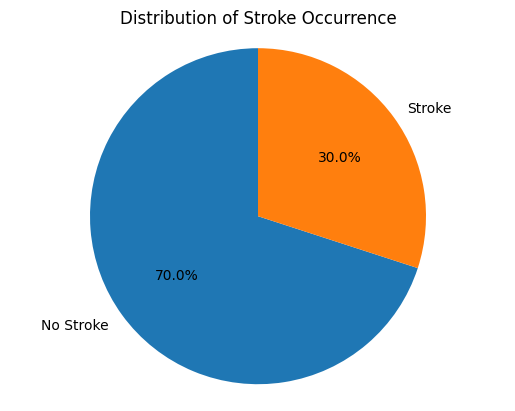

In [11]:
# Count the number of instances for each class
stroke_counts = balanced_sample['stroke'].value_counts()

# Create a pie chart
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Stroke Occurrence')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Correlation Matrix:
                      gender       age  hypertension  heart_disease  \
gender             1.000000  0.013131     -0.038856      -0.056691   
age                0.013131  1.000000      0.294360       0.271413   
hypertension      -0.038856  0.294360      1.000000       0.121203   
heart_disease     -0.056691  0.271413      0.121203       1.000000   
ever_married       0.022873 -0.622402     -0.137457      -0.069756   
work_type         -0.045185 -0.403996     -0.055369      -0.084765   
Residence_type     0.010858  0.001353      0.055580       0.011732   
avg_glucose_level -0.090830  0.301464      0.127882       0.127639   
bmi               -0.016907  0.266219      0.129833       0.042377   
smoking_status    -0.027394 -0.339536     -0.159377      -0.093192   
stroke            -0.002745  0.484957      0.215714       0.174714   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                 0.022873  -0.045185        0.01085

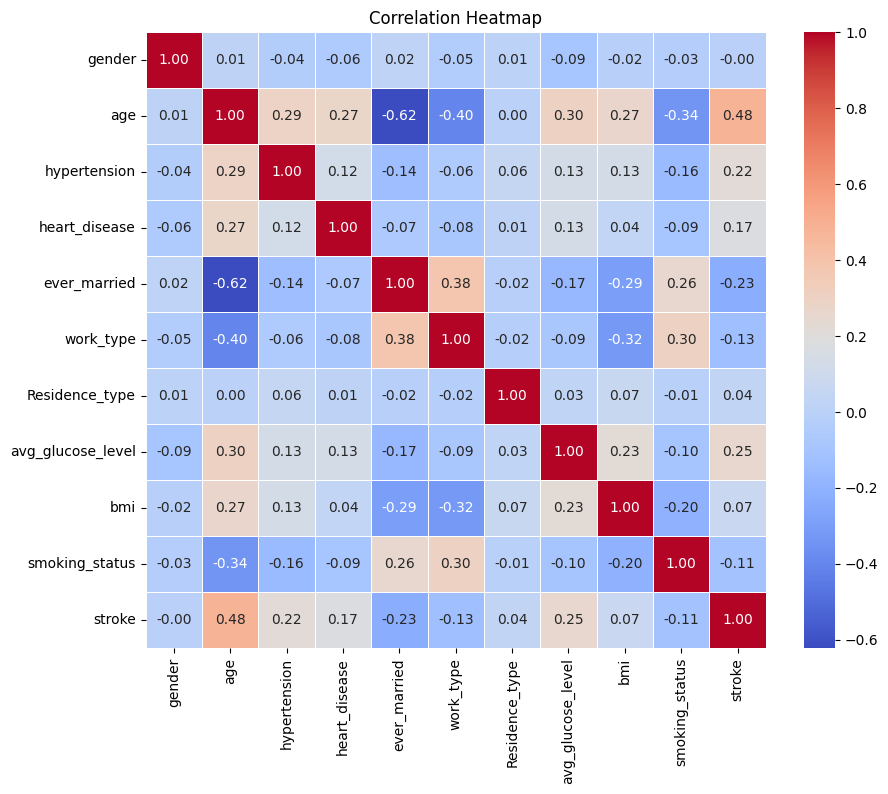

In [12]:
# Ensure 'avg_glucose_level' and 'bmi' are numeric
balanced_sample['avg_glucose_level'] = pd.to_numeric(balanced_sample['avg_glucose_level'], errors='coerce')
balanced_sample['bmi'] = pd.to_numeric(balanced_sample['bmi'], errors='coerce')

# Calculate the correlation matrix for numeric columns
correlation_matrix = balanced_sample.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()

#### Correlation meanings:
- values close to +1 has positive correlation (as one variable increases, the other increases in a perfectly linear fashion).
- values close to -1 has negative correlation (as one variable increases, the other decreases in a perfectly linear fashion).
- values =0: No correlation (the variables are independent or have no linear relationship).


#### Findings:
- "Age" has moderate positive correlation with stroke. As age increases, the risk of stroke tends to increase.
- "Heart Disease", "Hypertension", "Average Glucose Level" have weak positive correlation, which means indivisuals having heart deseases or hypertension or increase in average glucose level show slight increase in stroke risk.
- "Ever Married" has weak negative coorelation with stroke, which means that being married is linked to a slightly lower risk of stroke
- "BMI", "Smoking Status", "Residence Type", "Gender" have very weak correlation with stroke. they have minimal or no impact on stroke risk.

### Scatter Plot for Age and Average Glucose Level





 The scatter plot visualizes the relationship between age and avg_glucose_level. Each point represents an individual's average glucose level against their age. This visualization helps identify trends or patterns in the data, such as whether certain age groups tend to have higher or lower glucose levels. The plot provides a broad view of how glucose levels vary across different ages and can be used to detect clusters, trends, or any potential outliers in the dataset. Overall, it offers insights into how age may relate to glucose levels in the population.

 #### Fondings:
 The majority of individuals have an average glucose level within the range of 60 to 125. A significant portion of those with glucose levels exceeding 125 are older adults, typically aged 55 and above.

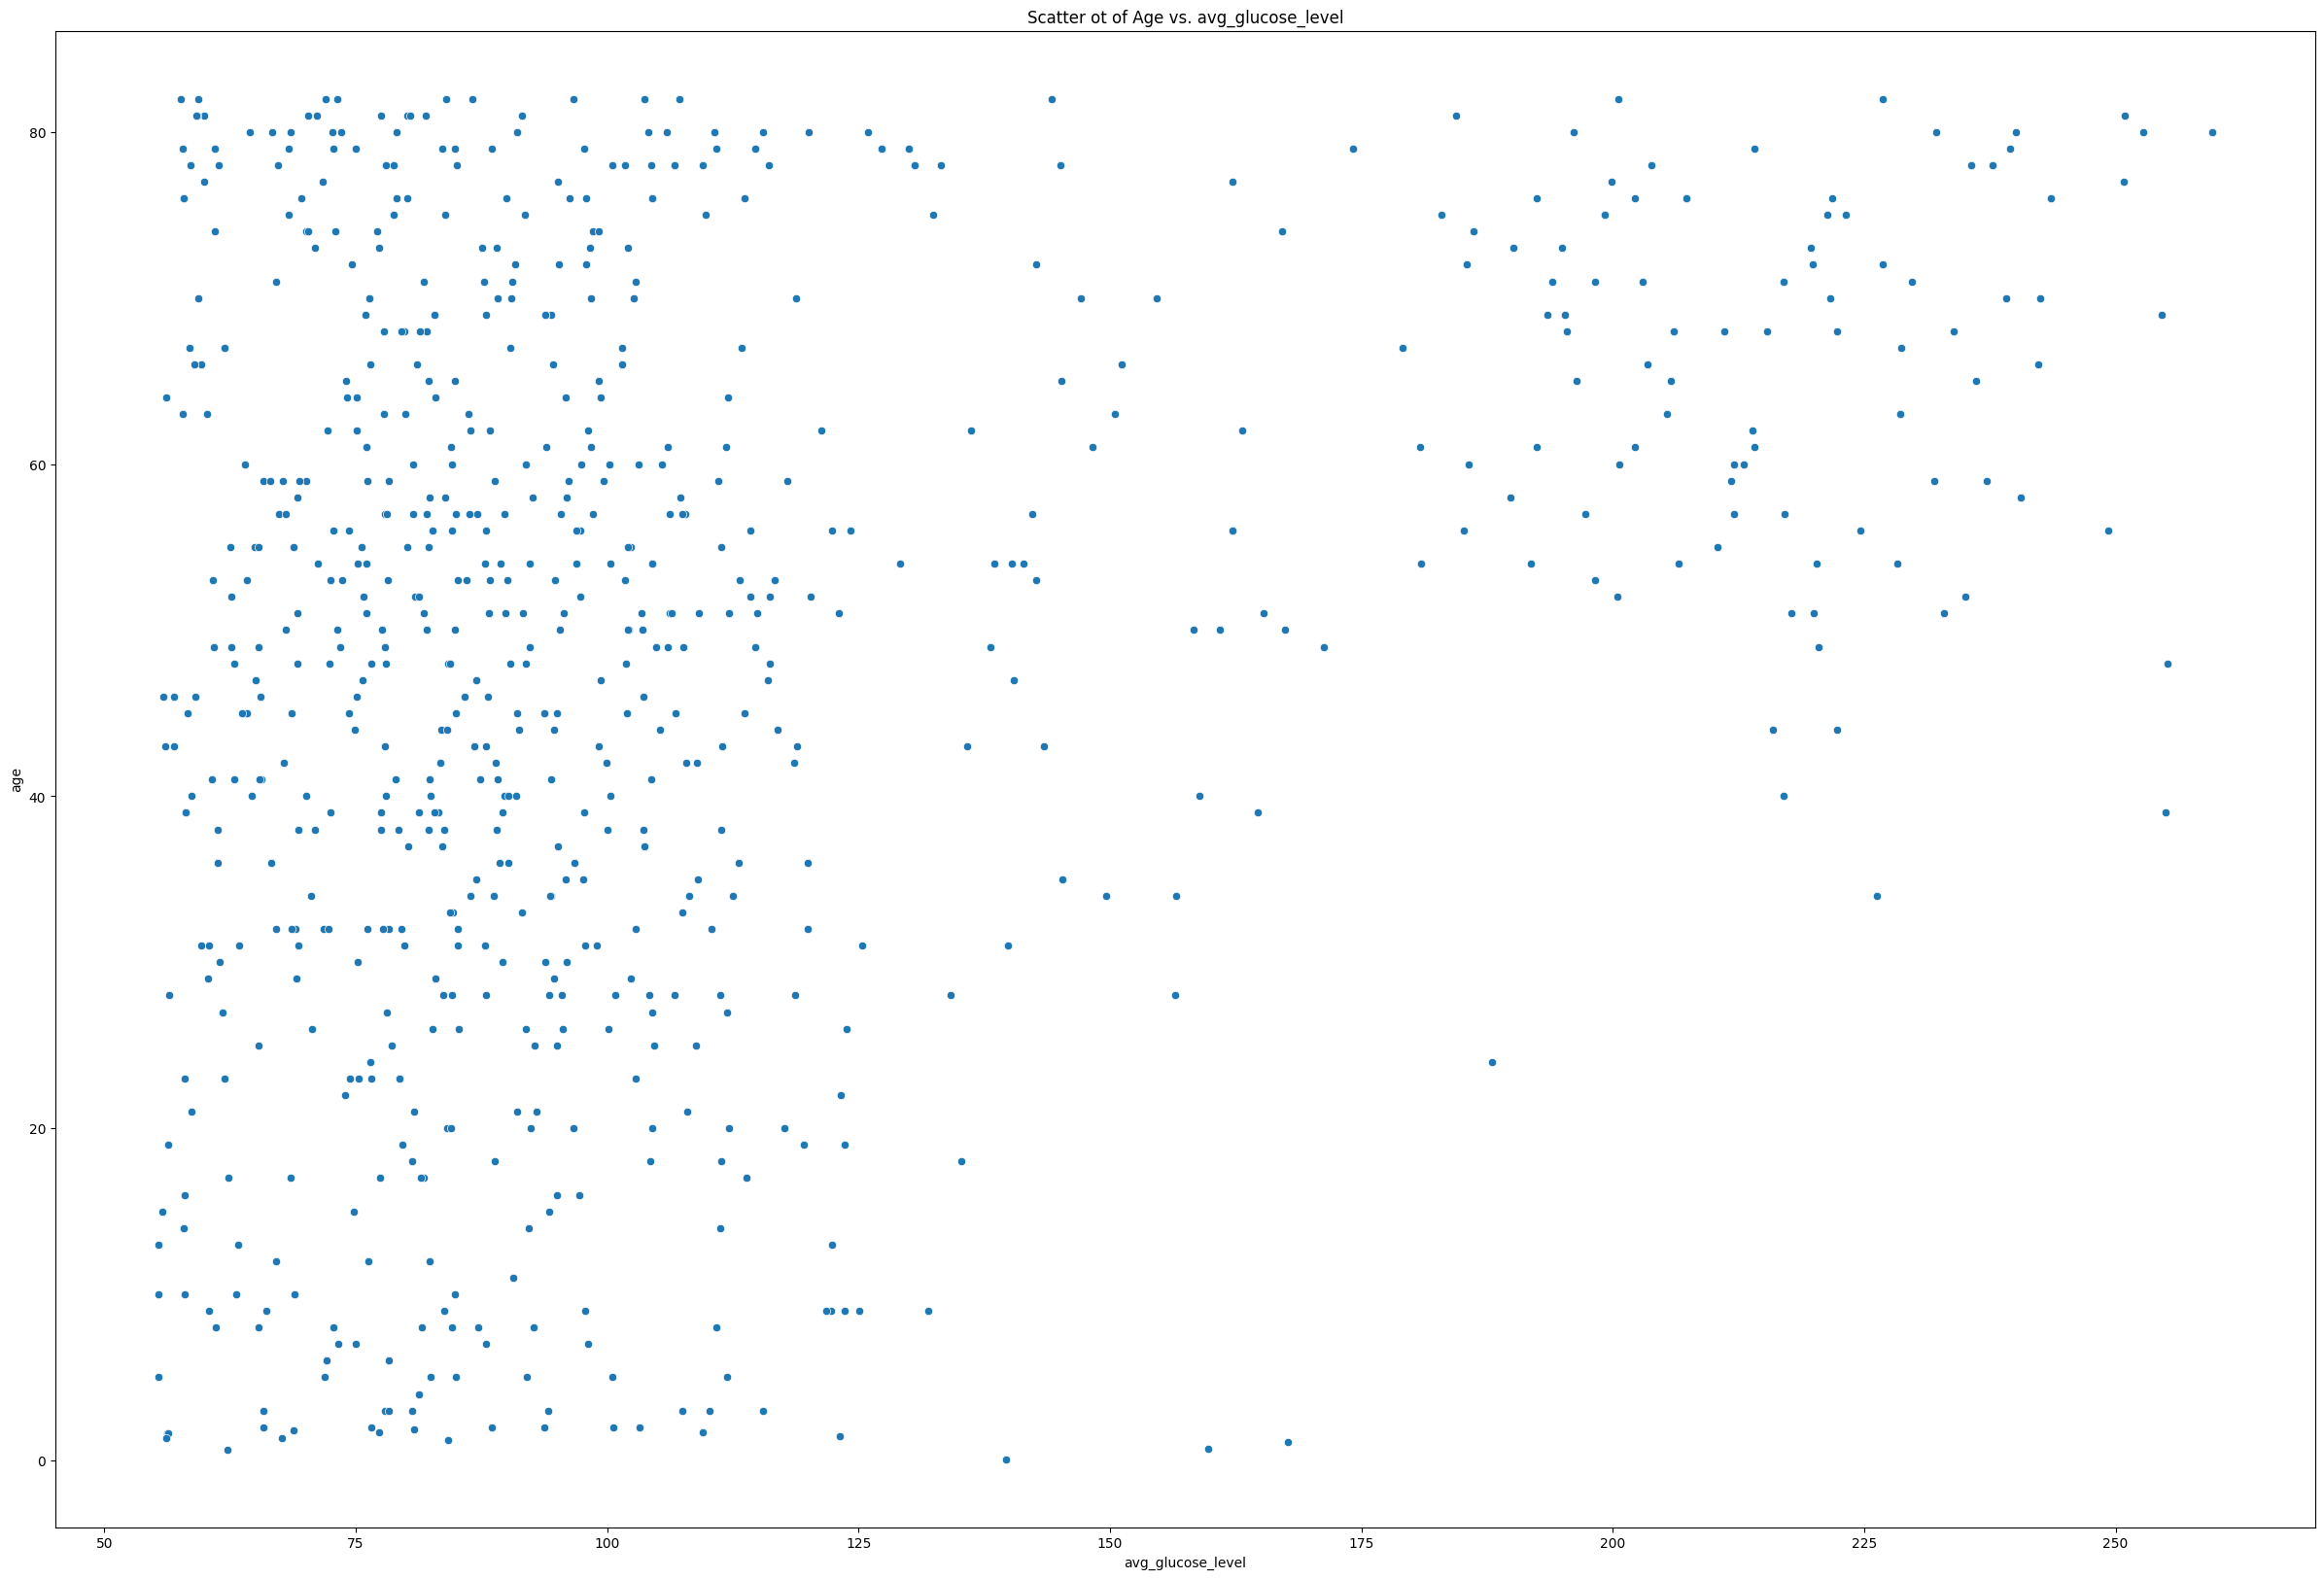

In [13]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='avg_glucose_level', y='age',data= balanced_sample)
plt.title( 'Scatter ot of Age vs. avg_glucose_level')
plt.xlabel('avg_glucose_level')
plt.ylabel('age')
plt.show()


## Histogram

Histogram for BMI
The histogram displays the distribution of bmi values across the dataset. It divides the bmi range into bins, with each bar representing the frequency of data points within that bin. This visualization provides insights into the concentration of BMI values,showing how they are spread among individuals. The shape of the histogram can reveal patterns, such as whether the BMI is mostly within a healthy range or skewed toward higher or lower values. This helps in understanding the general health profile of the population based on BMI.

#### Findings:
The majority of BMI values are clustered between 25 and 30, indicating a high frequency in this range.

<Axes: title={'center': 'BMI Distribution'}, ylabel='Frequency'>

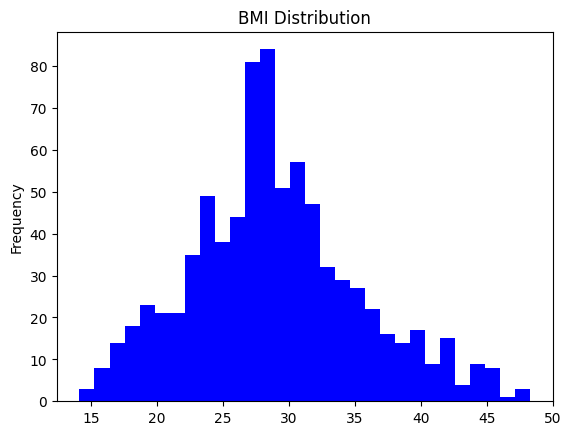

In [14]:
balanced_sample['bmi'].plot.hist(bins=30, color='blue', title='BMI Distribution')

### Box plot:
The box plot is a standaried way of displaying the distribution of data based on a five number summary

<function matplotlib.pyplot.show(close=None, block=None)>

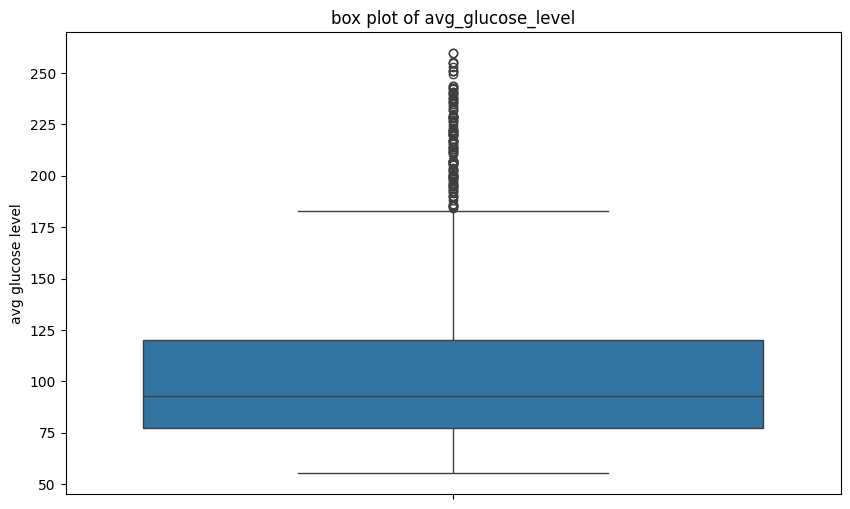

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=balanced_sample['avg_glucose_level'])
plt.title('box plot of avg_glucose_level')
plt.ylabel('avg glucose level')
plt.show

As we see the attribute avg glucose level has a wide range of data with a median of 90 and outliers in the range 180-260

<function matplotlib.pyplot.show(close=None, block=None)>

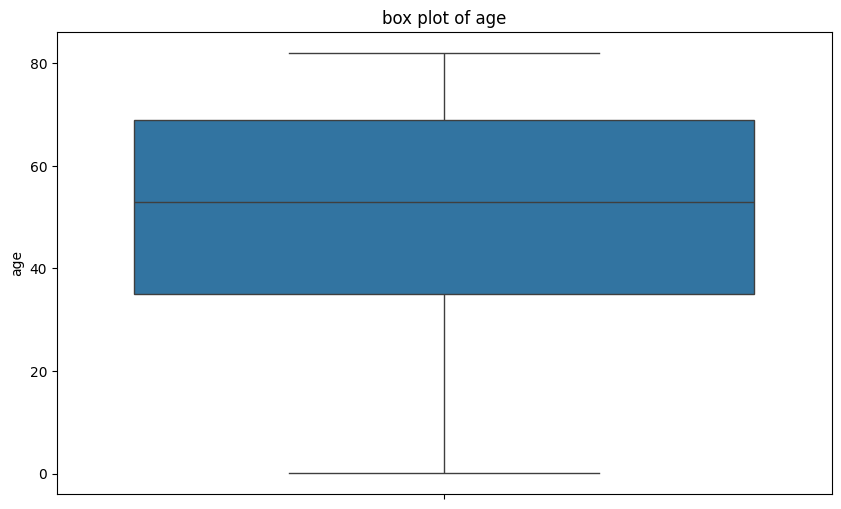

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=balanced_sample['age'])
plt.title('box plot of age')
plt.ylabel('age')
plt.show

The box plot of age is a standaried way of displaying the distribution of data based on a five number summary, as we see the attribute age has a wide range of data with a median of 52 and no outliers


<function matplotlib.pyplot.show(close=None, block=None)>

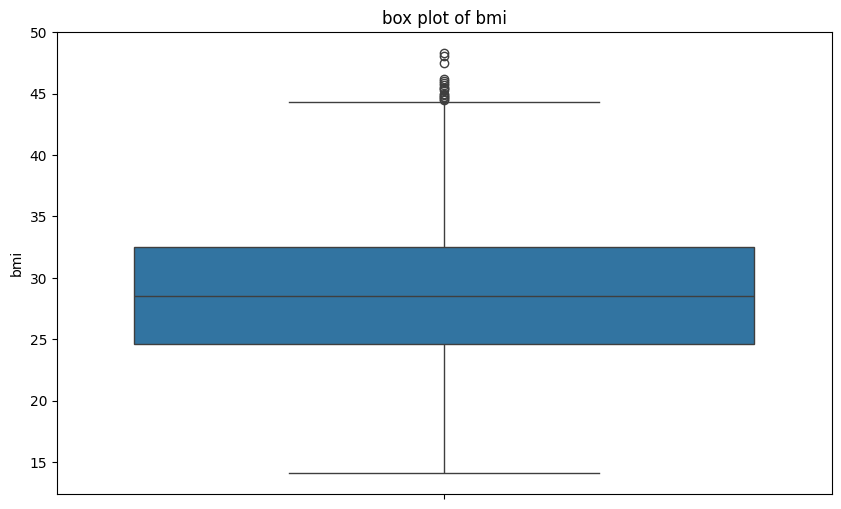

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=balanced_sample['bmi'])
plt.title('box plot of bmi')
plt.ylabel('bmi')
plt.show

the box plot is a standaried way of displaying the distribution of data based on a five number summary, as we see the attribute bmi has a wide range of data with a median of 28 which indicates that more than 50% of the sample are obese, and there is some outliers between 45-50

### Counting null values:
As showing, there is no null values in out dataset.

In [18]:
print("Missing values in each column:")
print(balanced_sample.isnull().sum())

Missing values in each column:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## Data Processing:
### Encoding:
The columns that needed to be transformed were the nominal ones. Since attributes like "work_type" and "smoking status" were already transformed from nominal to integer values, we didn't need to perform this step as part of our data preparation process.
### Duplicates:
As shown downbelow our dataset contained 83 duplicates, we removed all redundant records from our dataset by dropping them.

In [19]:
noDup = balanced_sample[balanced_sample.duplicated()]
print(noDup)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
198        1  51.0             1              0             0          0   
142        0  72.0             1              0             0          1   
102        0  80.0             0              0             0          0   
141        1  80.0             1              0             0          1   
172        1  39.0             0              0             0          0   
...      ...   ...           ...            ...           ...        ...   
110        1  68.0             1              0             0          1   
38         0  76.0             1              0             0          0   
115        1  75.0             0              0             0          0   
198        1  51.0             1              0             0          0   
4795       1  66.0             0              0             0          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
198            

In [20]:
noDup = balanced_sample.drop_duplicates()

to ensure that all rows were removed, we calculated duplicates again.

In [21]:
noDup = noDup.duplicated()

#count the number of duplicates
num_duplicates = noDup.sum()
print(f"There are {num_duplicates} duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


### Outliers:
We identified outliers in our data by separately calculating them for each attribute type (binary, nominal, numeric), we calculated the outliers of the binaries and nominal integrs to ensure that there is no misentering values out of range, and to avoid mistakenly considering values as outliers based on comparison to the entire dataset. Once we identified these outliers, we took appropriate measures to handle them.

In [28]:
noDup = balanced_sample.drop_duplicates()

print(noDup.columns)

# Specify the columns of interest
columns_of_interest = ['hypertension', 'avg_glucose_level', 'bmi']

# Count outliers in the specified columns
outlier_counts = {}
total_rows_with_outliers = 0

for column in columns_of_interest:
    outlier_threshold = 1.5
    q1 = np.percentile(noDup[column], 25)
    q3 = np.percentile(noDup[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (noDup[column] > upper_bound) | (noDup[column] < lower_bound)
    outlier_counts[column] = sum(outliers)
    total_rows_with_outliers += sum(outliers)

# Print the results
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Outlier Counts:
hypertension: 101 rows with outliers
avg_glucose_level: 99 rows with outliers
bmi: 7 rows with outliers
Total Rows with Outliers: 207


### Handling outliers:
After analysing outliers for numeric values we found that our numeric attributes contains exactly 207 outlier value overall, 101 raw of them from hypertention, 99 from the average glucose level, and 7 of them from the bmi column. Since the raws are a lot we prefered not to drop the raw, and other than that we handled the outliers by sommthing them using the capping out process(Winsorization), we prefered it most because it reduce the value to the neerest minimumm/ maximumm value that is not in outliered.

And to ensure that there is no outliers and all outliers were handled we recounted the outliers

In [30]:
# Specify the columns of interest
columns_of_interest = ['hypertension', 'avg_glucose_level', 'bmi']

# Count outliers in the specified columns and handle them using capping
outlier_counts = {}

for column in columns_of_interest:
    outlier_threshold = 1.5
    q1 = np.percentile(noDup[column], 25)
    q3 = np.percentile(noDup[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr

    # Find the outliers
    outliers = (noDup[column] > upper_bound) | (noDup[column] < lower_bound)
    outlier_counts[column] = sum(outliers)

    # Cap the outliers at the upper and lower bounds
    noDup.loc[noDup[column] > upper_bound, column] = upper_bound
    noDup.loc[noDup[column] < lower_bound, column] = lower_bound

# Print the results
print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

# Save the dataset after capping outliers
noDup.to_csv('postCleaning_dataset.csv', index=False)

Outlier Counts:
hypertension: 0 rows with outliers
avg_glucose_level: 0 rows with outliers
bmi: 0 rows with outliers


To ensure there is no miss-entry we counted the outliers for other data types

In [34]:
# Specify the columns of nominal
columns_of_interest = ['work_type', 'smoking_status']

# Dictionary to store any rows with mis-entries
mis_entries = {}

for column in columns_of_interest:
    # Find entries that are not 0 or 1
    invalid_entries = balanced_sample[~balanced_sample[column].isin([0, 1, 2, 3])]

    # If there are any invalid entries, store them
    if len(invalid_entries) > 0:
        mis_entries[column] = invalid_entries

    # Print the result
    print(f"{column}: {len(invalid_entries)} mis-entries found")

# If needed, you can also display the rows with mis-entries
for column, entries in mis_entries.items():
    print(f"\nInvalid entries in '{column}':")
    print(entries)

work_type: 0 mis-entries found
smoking_status: 0 mis-entries found


In [33]:
# Specify the columns of interest (binary columns expected)
columns_of_interest = ['stroke', 'gender', 'heart_disease', 'ever_married', 'Residence_type']

# Dictionary to store any rows with mis-entries
mis_entries = {}

for column in columns_of_interest:
    # Find entries that are not 0 or 1
    invalid_entries = balanced_sample[~balanced_sample[column].isin([0, 1])]

    # If there are any invalid entries, store them
    if len(invalid_entries) > 0:
        mis_entries[column] = invalid_entries

    # Print the result
    print(f"{column}: {len(invalid_entries)} mis-entries found")

# If needed, you can also display the rows with mis-entries
for column, entries in mis_entries.items():
    print(f"\nInvalid entries in '{column}':")
    print(entries)

stroke: 0 mis-entries found
gender: 0 mis-entries found
heart_disease: 0 mis-entries found
ever_married: 0 mis-entries found
Residence_type: 0 mis-entries found


## Transformation:
After cleaning data and handling the outliers, we proceeded to perform the remaining transformation steps, including normalization and discretization.

### Normalization:
We preformed the normalization process to the attributes having continous value to be in shorter limited range (between 0 and 1) rather than large numbers.

In [35]:
cd= pd.read_csv('postCleaning_dataset.csv')

#determine the columns to normalize
cols=['avg_glucose_level','bmi']

# Normalize the BMI column using Min-Max scaling
for col in cols:
    scaler = MinMaxScaler()
    cd[cols] = scaler.fit_transform(cd[cols])

#Printing output after normalizing
print("Output after Max/Min Scaling Normalization:\n")
print(pd.DataFrame(cd))

# Save the updated DataFrame
cd.to_csv('postnormalize_dataset.csv', index=False)

Output after Max/Min Scaling Normalization:

     gender    age  hypertension  heart_disease  ever_married  work_type  \
0         0  60.00             0              0             0          2   
1         1  69.00             0              0             0          2   
2         1  51.00             0              0             0          0   
3         1  81.00             0              0             1          2   
4         1  78.00             0              0             0          0   
..      ...    ...           ...            ...           ...        ...   
712       1  78.00             0              0             0          0   
713       1  62.00             0              0             0          2   
714       1  33.00             0              0             1          0   
715       1   1.72             0              0             1          3   
716       0  64.00             0              1             0          0   

     Residence_type  avg_glucose_level    

### Descritization:
We applied discretization to the "age" attribute, as it is commonly divided into three categories based on typical medical classifications:

Child: [0, 17], Adult: [18, 64], Older Adult: [65, 100]

**the last partition upper limit is 100 beacaue the maximmum age in our dataset is 82.

In [36]:
cd= pd.read_csv('postnormalize_dataset.csv')

# Define age bins and labels
bins = [0, 17, 64, 100]  # Age ranges: 0-17 for child, 18-64 for adults, 65+ for Older adults
labels = ['Child', 'Adult', 'Older Adult']

# Discretize the Age column
cd['age'] = pd.cut(cd['age'], bins=bins, labels=labels, right=True)

# Display some of updated DataFrame
print("Output after Age Descritization:\n")
print(pd.DataFrame(cd))

# save the updated DataFrame to a new CSV file
cd.to_csv('postDescritize_dataset.csv', index=False)

Output after Age Descritization:

     gender          age  hypertension  heart_disease  ever_married  \
0         0        Adult             0              0             0   
1         1  Older Adult             0              0             0   
2         1        Adult             0              0             0   
3         1  Older Adult             0              0             1   
4         1  Older Adult             0              0             0   
..      ...          ...           ...            ...           ...   
712       1  Older Adult             0              0             0   
713       1        Adult             0              0             0   
714       1        Adult             0              0             1   
715       1        Child             0              0             1   
716       0        Adult             0              1             0   

     work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
0            2               0    

#Feature Selection:

We opted for the filter selection method due to its computational efficiency and speed, making it ideal for our dataset. This approach allows us to quickly identify the top 5 most important features that are strongly correlated with the occurrence of strokes. By focusing on these high-correlation features, we can streamline the model building process while retaining the variables most likely to impact stroke prediction.

To prevent biased correlations, we removed the 'stroke' column before analyzing with other features, because it will always give the highest correlation.

and as shown, based on the selection process, the top 5 attributes selected with highest correlation are( age, hypertension, heart_disease, ever_married, and avg_glucose_level)

In [39]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the absolute correlations and mask the diagonal (self-correlations)
correlation_matrix_abs = correlation_matrix.abs()
np.fill_diagonal(correlation_matrix_abs.values, 0)

# Find the index of the maximum correlation
max_corr_value = correlation_matrix_abs.max().max()
max_corr_pair = correlation_matrix_abs.stack().idxmax()

# Print the highest correlation and the corresponding pair
print(f"The highest correlation is {max_corr_value:.4f} between {max_corr_pair}")

The highest correlation is 0.6771 between ('age', 'ever_married')


In [38]:
# Separate features and target variable from the balanced_sample
X = balanced_sample.drop('stroke', axis=1)  # Features
y = balanced_sample['stroke']                 # Target variable

# Use SelectKBest with f_classif as the scoring function
k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Display the selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')
